In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# Reading the daywise new cases and deaths in USA.

dayWise = pd.read_csv("../../DATASETS/COVID DATASETS/CovidDayWise.csv")
dayWise.drop(['Unnamed: 0'],axis = 1, inplace = True)
dayWise

,countyFIPS,County Name,State,StateFIPS,Date,Number of new cases,Number of new Deaths
0,1001,Autauga County,AL,1,2022-05-30,9,0
1,1003,Baldwin County,AL,1,2022-05-30,55,1
2,1005,Barbour County,AL,1,2022-05-30,1,0
3,1007,Bibb County,AL,1,2022-05-30,9,0
4,1009,Blount County,AL,1,2022-05-30,6,0
...,...,...,...,...,...,...,...
681809,56037,Sweetwater County,WY,56,2023-01-01,0,0
681810,56039,Teton County,WY,56,2023-01-01,0,0
681811,56041,Uinta County,WY,56,2023-01-01,0,0
681812,56043,Washakie County,WY,56,2023-01-01,0,0


In [3]:
# Grouping them by Date to find total number of cases in a particular day.

dayWise = dayWise.groupby(['Date'])['Number of new cases','Number of new Deaths'].sum().reset_index()
dayWise

C:\Users\venka\AppData\Local\Temp\ipykernel_19256\963740360.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dayWise = dayWise.groupby(['Date'])['Number of new cases','Number of new Deaths'].sum().reset_index()


,Date,Number of new cases,Number of new Deaths
0,2022-05-30,51206,122
1,2022-05-31,76840,166
2,2022-06-01,158949,483
3,2022-06-02,67209,192
4,2022-06-03,206850,219
...,...,...,...
212,2022-12-28,28200,217
213,2022-12-29,80280,214
214,2022-12-30,107584,1510
215,2022-12-31,214,3


In [4]:
# Any negative data present in the data is made to zero.

dayWise[dayWise['Number of new cases']<0]=0
dayWise[dayWise['Number of new Deaths']<0]=0

In [5]:
# counting the number of days in the last six months of 2022.

days = []
for i in range(217):
    days.append(i)

days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [6]:
x = pd.DataFrame({'days': days})

yCases = dayWise['Number of new cases']
yDeaths = dayWise['Number of new Deaths']

In [7]:
# Generating Prediction days for the next 1 week.

predictDays = []
for i in range(len(x), len(x)+7):
    predictDays.append(i)
predictDays = pd.DataFrame({'Future days': predictDays})
predictDays

,Future days
0,217
1,218
2,219
3,220
4,221
5,222
6,223


# Linear Regression and Forecasting.

In [8]:
# Generating a linear model regression for cases in USA.

linearModelCases = LinearRegression()
linearModelCases.fit(x,yCases)
casesTrend = linearModelCases.predict(x)

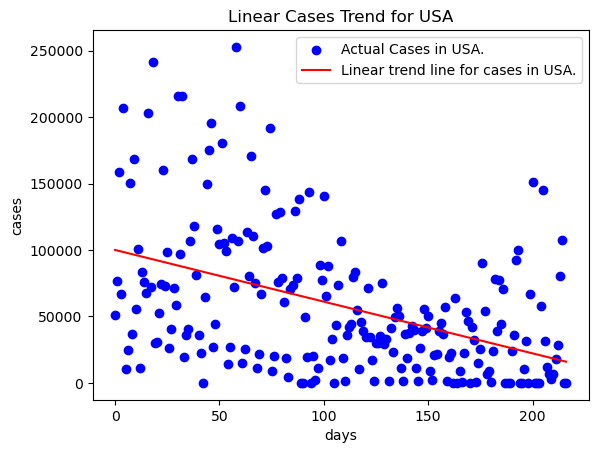

In [9]:
# Plotting the linear regression for the Number of cases in USA.

plt.title('Linear Cases Trend for USA')
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(x, yCases, color='blue', label='Actual Cases in USA.')
plt.plot(x, casesTrend, color='red', label='Linear trend line for cases in USA.')
plt.legend()

In [10]:
# RMSE error for the actual cases and predicted cases in USA.

rmseCases = mean_squared_error(yCases, casesTrend, squared=False)
rmseCases

48745.96671545787

In [11]:
# Forecasting the number of cases for 1 week ahead.

forecastCases = linearModelCases.predict(predictDays)
forecastCases

C:\Users\venka\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Future days
Feature names seen at fit time, yet now missing:
- days

  warnings.warn(message, FutureWarning)


array([15623.63402458, 15234.49575811, 14845.35749165, 14456.21922519,
       14067.08095872, 13677.94269226, 13288.8044258 ])

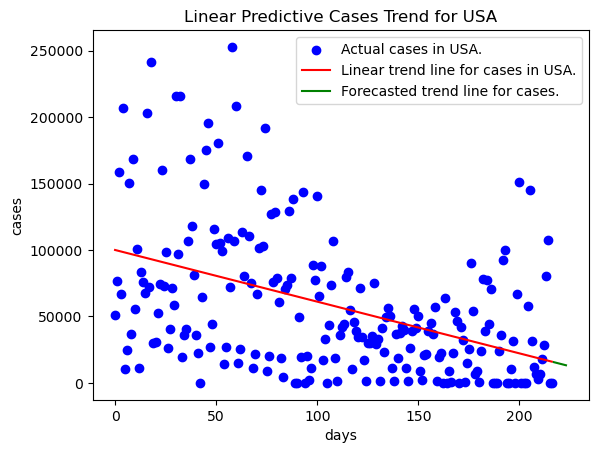

In [12]:
# Plotting the predicted cases for 1 week ahead.

plt.title('Linear Predictive Cases Trend for USA')
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(x, yCases, color='blue', label='Actual cases in USA.')
plt.plot(x, casesTrend, color='red', label='Linear trend line for cases in USA.')
plt.plot(predictDays['Future days'], forecastCases, color='green', label='Forecasted trend line for cases.')
plt.legend()

In [13]:
# Generating the linear model regression for Deaths in USA.

linearModelDeaths = LinearRegression()
linearModelDeaths.fit(x,yDeaths)
deathsTrend = linearModelDeaths.predict(x)

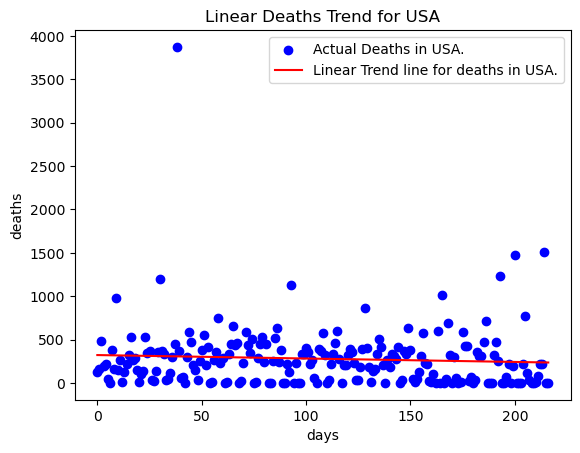

In [14]:
# Plotting the trend line for the number of deaths in USA.

plt.title('Linear Deaths Trend for USA')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(x, yDeaths, color = 'blue', label='Actual Deaths in USA.')
plt.plot(x, deathsTrend, color='red',label='Linear Trend line for deaths in USA.' )
plt.legend()

In [15]:
# RMSE error for actual deaths and predicted deaths for USA.

rmse = mean_squared_error(yDeaths, deathsTrend, squared=False)
rmse

359.8176853371268

In [16]:
# Forecating Deaths using linear model for 1 week ahead.

forecastDeaths = linearModelDeaths.predict(predictDays)
forecastDeaths

C:\Users\venka\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Future days
Feature names seen at fit time, yet now missing:
- days

  warnings.warn(message, FutureWarning)


array([235.06349206, 234.66661969, 234.26974732, 233.87287495,
       233.47600257, 233.0791302 , 232.68225783])

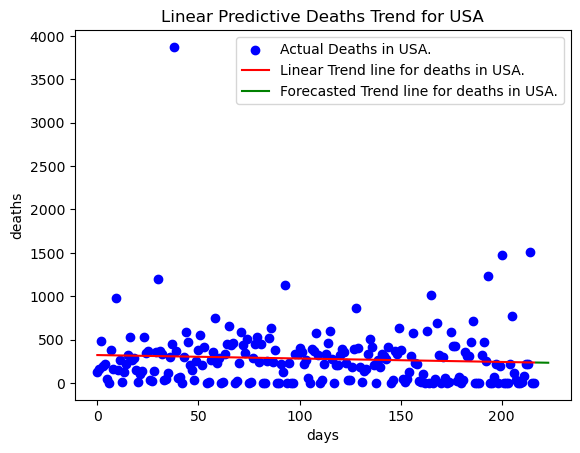

In [17]:
# Plotting the predictive deaths for 1 week ahead.

plt.title('Linear Predictive Deaths Trend for USA')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(x, yDeaths, color = 'blue', label='Actual Deaths in USA.')
plt.plot(x, deathsTrend, color='red', label='Linear Trend line for deaths in USA.' )
plt.plot(predictDays['Future days'], forecastDeaths, color='green', label='Forecasted Trend line for deaths in USA.')
plt.legend()

# Non Linear Regression and Forecasting.

In [18]:
# Modelling a non-linear regression of degree 6. I have tried all the degrees for to know which degree has the optimal fit.
# Degree 6 has the optimal fit for the data.

nonLinear = PolynomialFeatures(degree=6)
days = np.array(days)
days = days.reshape(-1,1)
xPoly = nonLinear.fit_transform(days)

In [19]:
# Applying linear model on polynomial fit to predict the trend.

linearModelCases.fit(xPoly, yCases)
polyCasesTrend = linearModelCases.predict(xPoly)

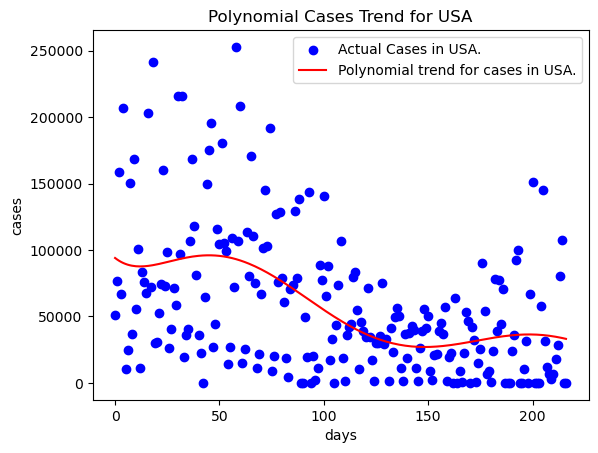

In [20]:
# Plotting polynomial trend for number of cases in USA.

plt.title('Polynomial Cases Trend for USA')
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(x, yCases, color='blue', label='Actual Cases in USA.')
plt.plot(x, polyCasesTrend, color='red', label='Polynomial trend for cases in USA.')
plt.legend()

In [21]:
# RMSE error for actual cases and polynomial trend for cases in USA.
rmsePolyCases = mean_squared_error(yCases, polyCasesTrend, squared=False)
rmsePolyCases

47310.29431728599

In [22]:
# Forecasting polynomial trend cases for 1 week ahead.

xFuturePoly = nonLinear.fit_transform(predictDays)
futureCasesTrend = linearModelCases.predict(xFuturePoly)
futureCasesTrend

array([32794.63475286, 32407.64626421, 32006.50459463, 31592.49921074,
       31167.03651018, 30731.64328255, 30287.9702088 ])

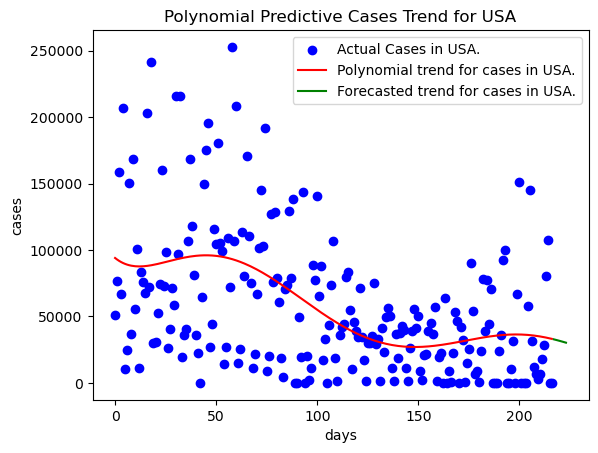

In [23]:
# Plotting the forecasted cases for 1 week ahead.

plt.title('Polynomial Predictive Cases Trend for USA')
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(x, yCases, color='blue', label='Actual Cases in USA.')
plt.plot(x, polyCasesTrend, color='red', label='Polynomial trend for cases in USA.')
plt.plot(predictDays['Future days'], futureCasesTrend, color='green', label='Forecasted trend for cases in USA.')
plt.legend()

In [24]:
# Applying linear model on polynomial fit for deaths.

linearModelDeaths.fit(xPoly, yDeaths)
polyDeathsTrend = linearModelDeaths.predict(xPoly)

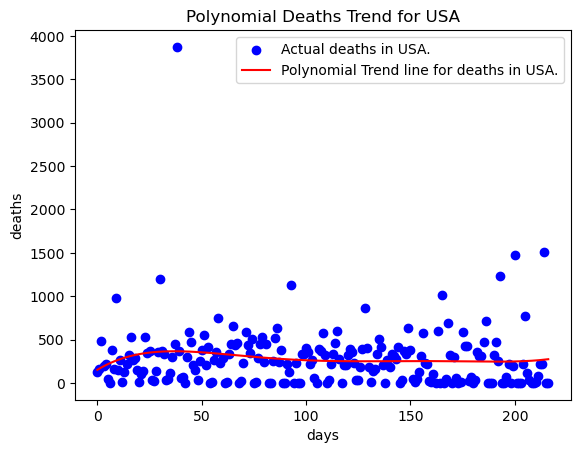

In [25]:
# Plotting the polynomial deaths trend for USA.

plt.title('Polynomial Deaths Trend for USA')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(x, yDeaths, color='blue', label='Actual deaths in USA.')
plt.plot(x, polyDeathsTrend, color='red', label='Polynomial Trend line for deaths in USA.')
plt.legend()

In [26]:
# RMSE error for actual deaths and polynomial deaths trend for USA.
rmsePolyDeaths = mean_squared_error(yDeaths, polyDeathsTrend, squared=False)
rmsePolyDeaths

357.9967720870376

In [27]:
# Forecasting polynomial deaths trend for 1 week ahead.

futureDeathsTrend = linearModelDeaths.predict(xFuturePoly)
futureDeathsTrend

array([276.42026785, 279.7810167 , 283.38910978, 287.25588301,
       291.39297829, 295.81234746, 300.52625629])

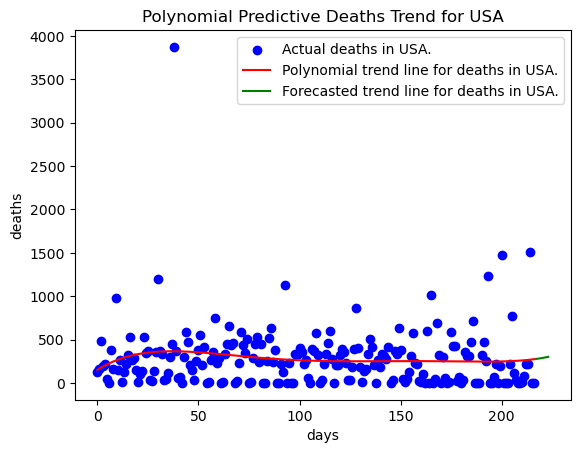

In [28]:
# Plotting forecasted polynomial deaths trend.

plt.title('Polynomial Predictive Deaths Trend for USA')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(x, yDeaths, color='blue', label='Actual deaths in USA.')
plt.plot(x, polyDeathsTrend, color='red', label='Polynomial trend line for deaths in USA.')
plt.plot(predictDays['Future days'], futureDeathsTrend, color='green', label='Forecasted trend line for deaths in USA.')
plt.legend()

# Bias versus Variance tradeoff

The bias and variance are the errors in the prediction data. Bias error results in an underfitting of the data that means it misses relation between feature and target. Variance error results in an overfitting  curve that means data is very sensitive and results in fluctuations even small variation of data.

Bias and variance tradeoff is nothing but generating an optimal fitting of the curve for the data. It should not the over fitting and underfitting.

# Trend compared to other states.

In [29]:
# Reading the world wide cases and deaths data.

worldWide = pd.read_csv("C:/Users/venka/OneDrive/Documents/GitHub/Ferocious5_CS605/DATASETS/COVID DATASETS/owid-covid-data-clean.csv")
worldWide

,iso_code,continent,location,date,new_cases,new_deaths,population
0,IDN,Asia,Indonesia,2020-01-03,0.0,0.0,275501344.0
1,IDN,Asia,Indonesia,2020-01-04,0.0,0.0,275501344.0
2,IDN,Asia,Indonesia,2020-01-05,0.0,0.0,275501344.0
3,IDN,Asia,Indonesia,2020-01-06,0.0,0.0,275501344.0
4,IDN,Asia,Indonesia,2020-01-07,0.0,0.0,275501344.0
...,...,...,...,...,...,...,...
4636,USA,North America,United States,2023-03-04,227828.0,2197.0,338289856.0
4637,USA,North America,United States,2023-03-05,NaN,NaN,338289856.0
4638,USA,North America,United States,2023-03-06,NaN,NaN,338289856.0
4639,USA,North America,United States,2023-03-07,NaN,NaN,338289856.0


In [30]:
# Converting the date column to datetype.

worldWide['date'] = pd.to_datetime(worldWide['date'])
worldWide.dtypes

iso_code              object
continent             object
location              object
date          datetime64[ns]
new_cases            float64
new_deaths           float64
population           float64
dtype: object

In [31]:
# Choosing three other countires  to compare the trend with USA.

CasesWorldIDN = worldWide.loc[worldWide['iso_code'] == 'IDN'] #INDONESIA
CasesWorldPAK = worldWide.loc[worldWide['iso_code'] == 'PAK'] #PAKISTHAN
CasesWorldNGA = worldWide.loc[worldWide['iso_code'] == 'NGA'] #NIGERIA

In [32]:
# choosing the start date and end date to keep only last 6 months data.

start_date = '2022-05-30'
end_date = '2023-01-01'
date_range = pd.date_range(start=start_date, end=end_date)

casesWorldNewIDN = CasesWorldIDN[(CasesWorldIDN['date']>= start_date) & (CasesWorldIDN['date']<= end_date)]
casesWorldNewPAK = CasesWorldPAK[(CasesWorldPAK['date']>= start_date) & (CasesWorldPAK['date']<= end_date)]
casesWorldNewNGA = CasesWorldNGA[(CasesWorldNGA['date']>= start_date) & (CasesWorldNGA['date']<= end_date)]


In [33]:
# Indonesia country data.

casesWorldNewIDN

,iso_code,continent,location,date,new_cases,new_deaths,population
878,IDN,Asia,Indonesia,2022-05-30,218.0,12.0,275501344.0
879,IDN,Asia,Indonesia,2022-05-31,340.0,5.0,275501344.0
880,IDN,Asia,Indonesia,2022-06-01,368.0,3.0,275501344.0
881,IDN,Asia,Indonesia,2022-06-02,304.0,6.0,275501344.0
882,IDN,Asia,Indonesia,2022-06-03,372.0,4.0,275501344.0
...,...,...,...,...,...,...,...
1090,IDN,Asia,Indonesia,2022-12-28,695.0,14.0,275501344.0
1091,IDN,Asia,Indonesia,2022-12-29,685.0,9.0,275501344.0
1092,IDN,Asia,Indonesia,2022-12-30,552.0,10.0,275501344.0
1093,IDN,Asia,Indonesia,2022-12-31,488.0,19.0,275501344.0


In [34]:
# Generating the polynomial trend and forecast 1 week ahead.

linearModelCases.fit(xPoly, casesWorldNewIDN['new_cases'])
polyCasesTrendIDN = linearModelCases.predict(xPoly)

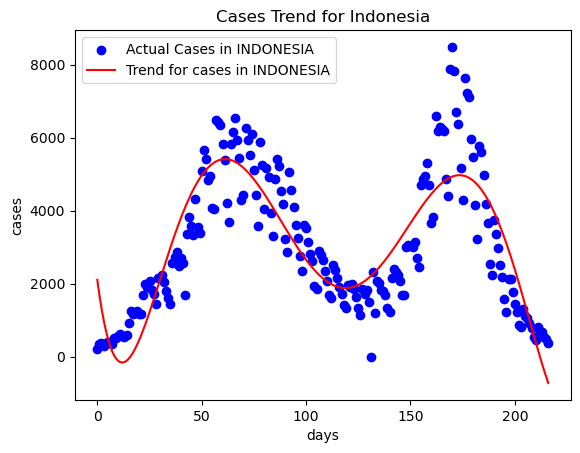

In [35]:
# Ploting the polynomial trend for cases in INDONESIA.

plt.title('Cases Trend for Indonesia')
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(x, casesWorldNewIDN['new_cases'], color='blue', label='Actual Cases in INDONESIA')
plt.plot(x, polyCasesTrendIDN, color='red', label='Trend for cases in INDONESIA')
plt.legend()

In [36]:
#Generating the polynomial trend for deaths in INDONESIA.

linearModelDeaths.fit(xPoly, casesWorldNewIDN['new_deaths'])
polyDeathsTrendIDN = linearModelDeaths.predict(xPoly)

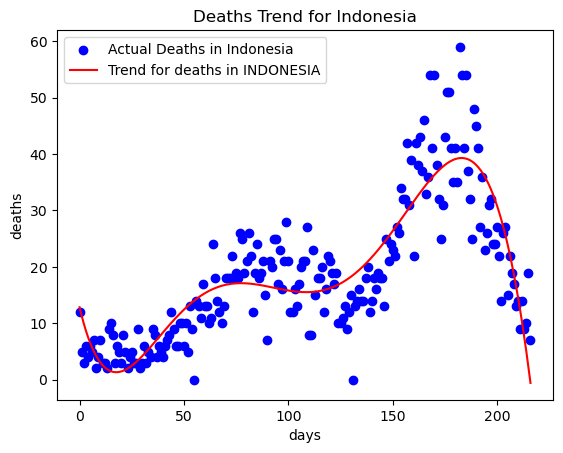

In [37]:
# Ploting the polynomial trend for deaths in INDONESIA.

plt.title('Deaths Trend for Indonesia')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(x, casesWorldNewIDN['new_deaths'], color='blue', label='Actual Deaths in Indonesia')
plt.plot(x, polyDeathsTrendIDN, color='red', label='Trend for deaths in INDONESIA')
plt.legend()

In [38]:
# Data of PAKISTHAN.

casesWorldNewPAK

,iso_code,continent,location,date,new_cases,new_deaths,population
3198,PAK,Asia,Pakistan,2022-05-30,50.0,0.0,235824864.0
3199,PAK,Asia,Pakistan,2022-05-31,48.0,0.0,235824864.0
3200,PAK,Asia,Pakistan,2022-06-01,54.0,0.0,235824864.0
3201,PAK,Asia,Pakistan,2022-06-02,66.0,0.0,235824864.0
3202,PAK,Asia,Pakistan,2022-06-03,67.0,0.0,235824864.0
...,...,...,...,...,...,...,...
3410,PAK,Asia,Pakistan,2022-12-28,0.0,0.0,235824864.0
3411,PAK,Asia,Pakistan,2022-12-29,0.0,0.0,235824864.0
3412,PAK,Asia,Pakistan,2022-12-30,0.0,0.0,235824864.0
3413,PAK,Asia,Pakistan,2022-12-31,0.0,0.0,235824864.0


In [39]:
# Generating trend for cases in PAKISTHAN.

linearModelCases.fit(xPoly, casesWorldNewPAK['new_cases'])
polyCasesTrendPAK = linearModelCases.predict(xPoly)

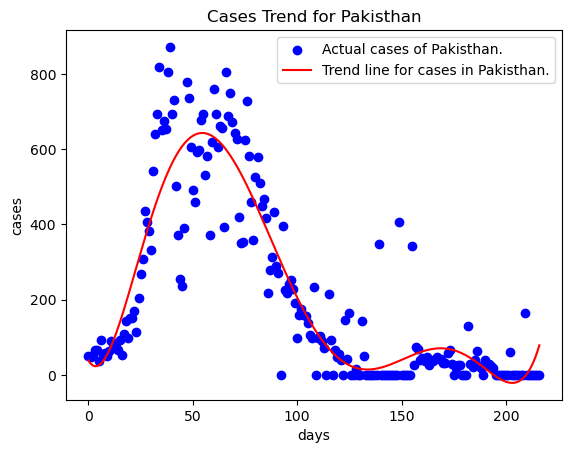

In [40]:
# Plotting cases trend for PAKISTHAN.

plt.title('Cases Trend for Pakisthan')
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(x, casesWorldNewPAK['new_cases'], color='blue', label='Actual cases of Pakisthan.')
plt.plot(x, polyCasesTrendPAK, color='red', label='Trend line for cases in Pakisthan.')
plt.legend()

In [41]:
# Generating trend for deaths in PAKISTHAN.

linearModelDeaths.fit(xPoly, casesWorldNewPAK['new_deaths'])
polyDeathsTrendPAK = linearModelDeaths.predict(xPoly)

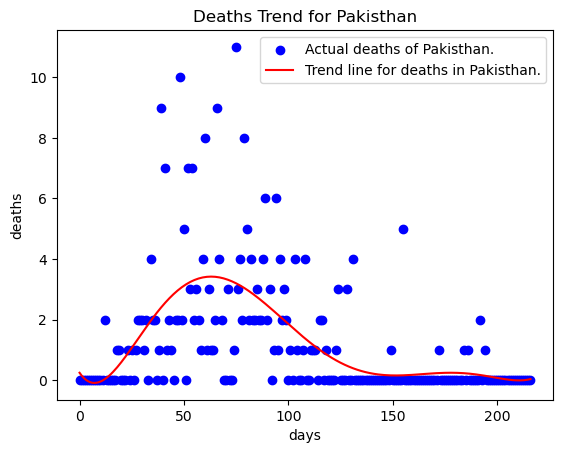

In [42]:
# Plotting deaths trend for PAKISTHAN.

plt.title('Deaths Trend for Pakisthan')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(x, casesWorldNewPAK['new_deaths'], color='blue', label='Actual deaths of Pakisthan.')
plt.plot(x, polyDeathsTrendPAK, color='red', label='Trend line for deaths in Pakisthan.')
plt.legend()

In [43]:
# Data for Nigeria.

casesWorldNewNGA

,iso_code,continent,location,date,new_cases,new_deaths,population
2038,NGA,Africa,Nigeria,2022-05-30,51.0,0.0,218541216.0
2039,NGA,Africa,Nigeria,2022-05-31,0.0,0.0,218541216.0
2040,NGA,Africa,Nigeria,2022-06-01,0.0,0.0,218541216.0
2041,NGA,Africa,Nigeria,2022-06-02,34.0,0.0,218541216.0
2042,NGA,Africa,Nigeria,2022-06-03,0.0,0.0,218541216.0
...,...,...,...,...,...,...,...
2250,NGA,Africa,Nigeria,2022-12-28,0.0,0.0,218541216.0
2251,NGA,Africa,Nigeria,2022-12-29,0.0,0.0,218541216.0
2252,NGA,Africa,Nigeria,2022-12-30,0.0,0.0,218541216.0
2253,NGA,Africa,Nigeria,2022-12-31,35.0,0.0,218541216.0


In [44]:
# Generating trend for cases in NIGERIA.

linearModelCases.fit(xPoly, casesWorldNewNGA['new_cases'])
polyCasesTrendNGA = linearModelCases.predict(xPoly)

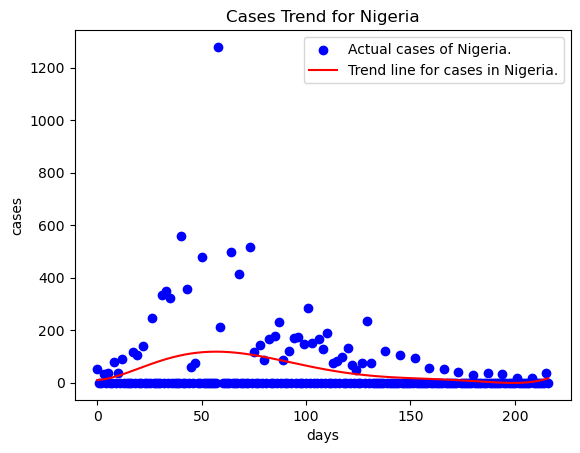

In [45]:
# Plotting cases trend for NIGERIA.

plt.title('Cases Trend for Nigeria')
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(x, casesWorldNewNGA['new_cases'], color='blue', label='Actual cases of Nigeria.')
plt.plot(x, polyCasesTrendNGA, color='red', label='Trend line for cases in Nigeria.')
plt.legend()

In [46]:
# Generating trend for deaths in NIGERIA.

linearModelDeaths.fit(xPoly, casesWorldNewNGA['new_deaths'])
polyDeathsTrendNGA = linearModelDeaths.predict(xPoly)

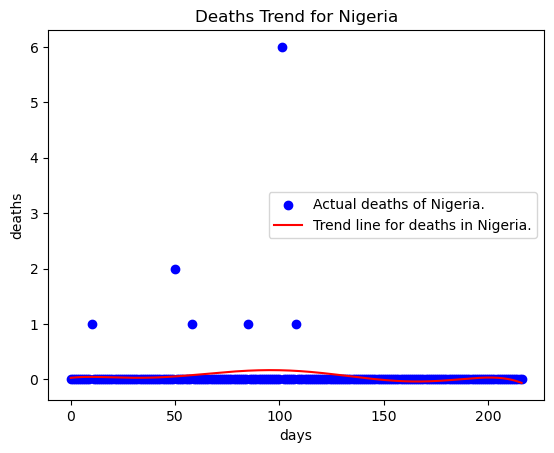

In [47]:
# Plotting deaths trend for NIGERIA.

plt.title('Deaths Trend for Nigeria')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(x, casesWorldNewNGA['new_deaths'], color='blue', label='Actual deaths of Nigeria.')
plt.plot(x, polyDeathsTrendNGA, color='red', label='Trend line for deaths in Nigeria.')
plt.legend()

# Comparision of other states with USA.

When compared to other nations USA has the highest number of cases per each day where as Nigeria has lowest number of cases on each day. At the end of last six months of 2022, Nigeria covid cases are almost equal to 0, where as USA has thousands of covid cases even at the end. Pakisthan covid cases has declined after 100 days and reported less than 100 cases for the next hundred days. Cases of Indonesia is very fluctuating that cases sharply declined between 100 to 150 days and then rapidly increased after 150 days and reported alomost 0 cases after 200th day.

Nigeria has the lowest number of deaths on each day where as USA has the highest number of deaths on each day. Pakisthan has its maximum deaths between 50 to 100 days and Indonesia has its highest number of deaths on each day between 150 to 200 days. Overall USA has witnessed maximum number of deaths on each day for the last 6 months of 2022.

# References:

1) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

2)https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform

3) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

4) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

5) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html